In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("male_players_16.csv")
pd.set_option('display.max_columns', None)   # correct spelling

df.replace('[!@#\?]', '', regex=True, inplace=True)

columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 
           'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb','lb', 'lcb', 'cb', 'rcb', 'rb']
df[columns]

for column in columns:
    df[column] = (df[column].astype(str).str.split('+').str[0].astype(float))

df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,111000000,550000,"RW, CF",Left,5,4,4,Medium/Low,Messi,Yes,NaN,"Speedster, Dribbler, FK Specialist, Acrobat, C...",RW,10.0,NaN,2004-07-01,2018.0,RW,10.0,92.0,88.0,86.0,95.0,24.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",80-4,93-1,71,88-1,85,96,89,90,79+3,96,95-1,90,92-2,92-2,95,80,68-5,76-1,59-1,88,48,22,90-2,90,74,NaN,13-12,23+2,21+1,6,11,15,14,8,87.0,87.0,87.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,90.0,82.0,82.0,82.0,90.0,62.0,57.0,57.0,57.0,62.0,57.0,44.0,44.0,44.0,57.0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,93,93,85500000,475000,"LW, LM",Right,5,4,5,High/Low,C. Ronaldo,Yes,NaN,"Speedster, Dribbler, Distance Shooter, Acrobat...",LM,7.0,NaN,2009-07-01,2018.0,ST,7.0,92.0,93.0,80.0,91.0,33.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",82-1,95,86,81-1,87,93,88,77-2,72,91-1,91,93-1,90-3,92+2,62-1,94,94,87-2,79,93,62-1,29+5,93+2,81,85,NaN,22,31,23,7,11,15,14,11,91.0,91.0,91.0,90.0,91.0,91.0,91.0,90.0,88.0,88.0,88.0,88.0,80.0,80.0,80.0,88.0,64.0,60.0,60.0,60.0,64.0,60.0,52.0,52.0,52.0,60.0
2,9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,56000000,250000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"Speedster, Dribbler, Distance Shooter, Acrobat",SUB,10.0,NaN,2009-08-28,2017.0,RW,11.0,92.0,86.0,82.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,51-1,85-1,86,93,86+1,83,74-2,90-2,92-1,92-1,91-2,91,91,86,61,76-2,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,84.0,84.0,84.0,89.0,88.0,88.0,88.0,89.0,88.0,88.0,88.0,87.0,80.0,80.0,80.0,87.0,65.0,60.0,60.0,60.0,65.0,59.0,47.0,47.0,47.0,59.0
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,90,90,58000000,250000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,87.0,91.0,86.0,60.0,90.0,"GK Long Throw, 1-on-1 Rush",15-10,13-12,25,48+6,11-14,16-9,14-11,11-14,47+6,31,58,61,43,88,35,25-17,78,44,83,16-9,29,30,12-13,70+20,37,NaN,10-15,10-15,11-14,85-3,87+2,91,90,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,28,1987-01-24,182,85,Uruguay,FC Barcelona,90,90,69000000,300000,ST,Right,5,4,4,High/Medium

In [19]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur            14881
player_tags                   13625
team_position                   171
team_jersey_number              171
loaned_from                   13827
joined                      

In [20]:
def missing_value(df, threshold=50):
    null_value = df.isnull().sum()
    percentage = (df.isnull().sum() / df.isnull().count() * 100)
    null_value = pd.concat([null_value, percentage], axis=1, keys=['Missing values', 'Missing Percentage'])
    null_value = null_value[(null_value['Missing Percentage'] < threshold) & (null_value['Missing values'] > 0)]
    return null_value
result = missing_value(df, threshold=50)
print(result)

                      Missing values  Missing Percentage
team_position                    171            1.149116
team_jersey_number               171            1.149116
joined                          1225            8.231974
contract_valid_until             171            1.149116
pace                            1618           10.872925
shooting                        1618           10.872925
passing                         1618           10.872925
dribbling                       1618           10.872925
defending                       1618           10.872925
physic                          1618           10.872925
ls                              1618           10.872925
st                              1618           10.872925
rs                              1618           10.872925
lw                              1618           10.872925
lf                              1618           10.872925
cf                              1618           10.872925
rf                             

In [21]:
columns_to_impute = ['release_clause_eur','contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

for column in columns_to_impute:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [22]:
for column in columns_to_impute:
    missing_count=df[column].isnull().sum()
    print(f"{column}:{missing_count}")

release_clause_eur:14881
contract_valid_until:0
pace:0
shooting:0
passing:0
dribbling:0
defending:0
physic:0


In [23]:
missing_percentage = df['release_clause_eur'].isnull().mean() * 100
print(missing_percentage)

100.0


In [24]:
df['release_clause_eur'].fillna(df['release_clause_eur'].median(), inplace=True)

In [25]:
df["team_position"].mode()

0    SUB
Name: team_position, dtype: object

In [26]:
df.loc[df["team_position"].isnull()==True,"team_position"]="SUB"

In [27]:
df["preferred_foot"].value_counts()

preferred_foot
Right    11451
Left      3430
Name: count, dtype: int64

In [28]:
df["preferred_foot"]=df["preferred_foot"].map({"Right":1,"Left":0})

In [29]:
df["team_position"].value_counts()

team_position
SUB    6544
RES    2323
GK      554
RCB     547
LCB     547
RB      508
LB      506
ST      374
RM      349
LM      342
RCM     314
LCM     311
CAM     290
RDM     226
LDM     220
RS      168
LS      166
LW      120
RW      117
CDM     114
CM       66
CB       39
LAM      32
RAM      31
LWB      28
RWB      27
CF        8
RF        5
LF        5
Name: count, dtype: int64

In [30]:
df.loc[df["team_position"]=="CF","team_position"]=0
df.loc[df["team_position"]=="LF","team_position"]=1
df.loc[df["team_position"]=="RF","team_position"]=2
df.loc[df["team_position"]=="LAM","team_position"]=3
df.loc[df["team_position"]=="RAM","team_position"]=4
df.loc[df["team_position"]=="LWB","team_position"]=5
df.loc[df["team_position"]=="RWB","team_position"]=6
df.loc[df["team_position"]=="CM","team_position"]=7
df.loc[df["team_position"]=="CB","team_position"]=8
df.loc[df["team_position"]=="RW","team_position"]=9
df.loc[df["team_position"]=="LW","team_position"]=10
df.loc[df["team_position"]=="CDM","team_position"]=11
df.loc[df["team_position"]=="LS","team_position"]=12
df.loc[df["team_position"]=="RS","team_position"]=13
df.loc[df["team_position"]=="LDM","team_position"]=14
df.loc[df["team_position"]=="RDM","team_position"]=15
df.loc[df["team_position"]=="CAM","team_position"]=16
df.loc[df["team_position"]=="LM","team_position"]=17
df.loc[df["team_position"]=="RM","team_position"]=18
df.loc[df["team_position"]=="LCM","team_position"]=19
df.loc[df["team_position"]=="RCM","team_position"]=20
df.loc[df["team_position"]=="ST","team_position"]=21
df.loc[df["team_position"]=="LB","team_position"]=22
df.loc[df["team_position"]=="RB","team_position"]=23
df.loc[df["team_position"]=="LCB","team_position"]=24
df.loc[df["team_position"]=="RCB","team_position"]=25
df.loc[df["team_position"]=="GK","team_position"]=26
df.loc[df["team_position"]=="RES","team_position"]=27
df.loc[df["team_position"]=="SUB","team_position"]=28

In [31]:
num_df = df.select_dtypes(include=["int64", "float64"])
num_df.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'mentality_composure', 'ls', 'st', 'rs', 'lw', 'lf',
       'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [43]:
import numpy as np

# Remove duplicate columns (VERY IMPORTANT)
df = df.loc[:, ~df.columns.duplicated()]

# Select numeric columns safely
num_df = df.select_dtypes(include=[np.number]).copy()

# Remove inf values
num_df.replace([np.inf, -np.inf], np.nan, inplace=True)


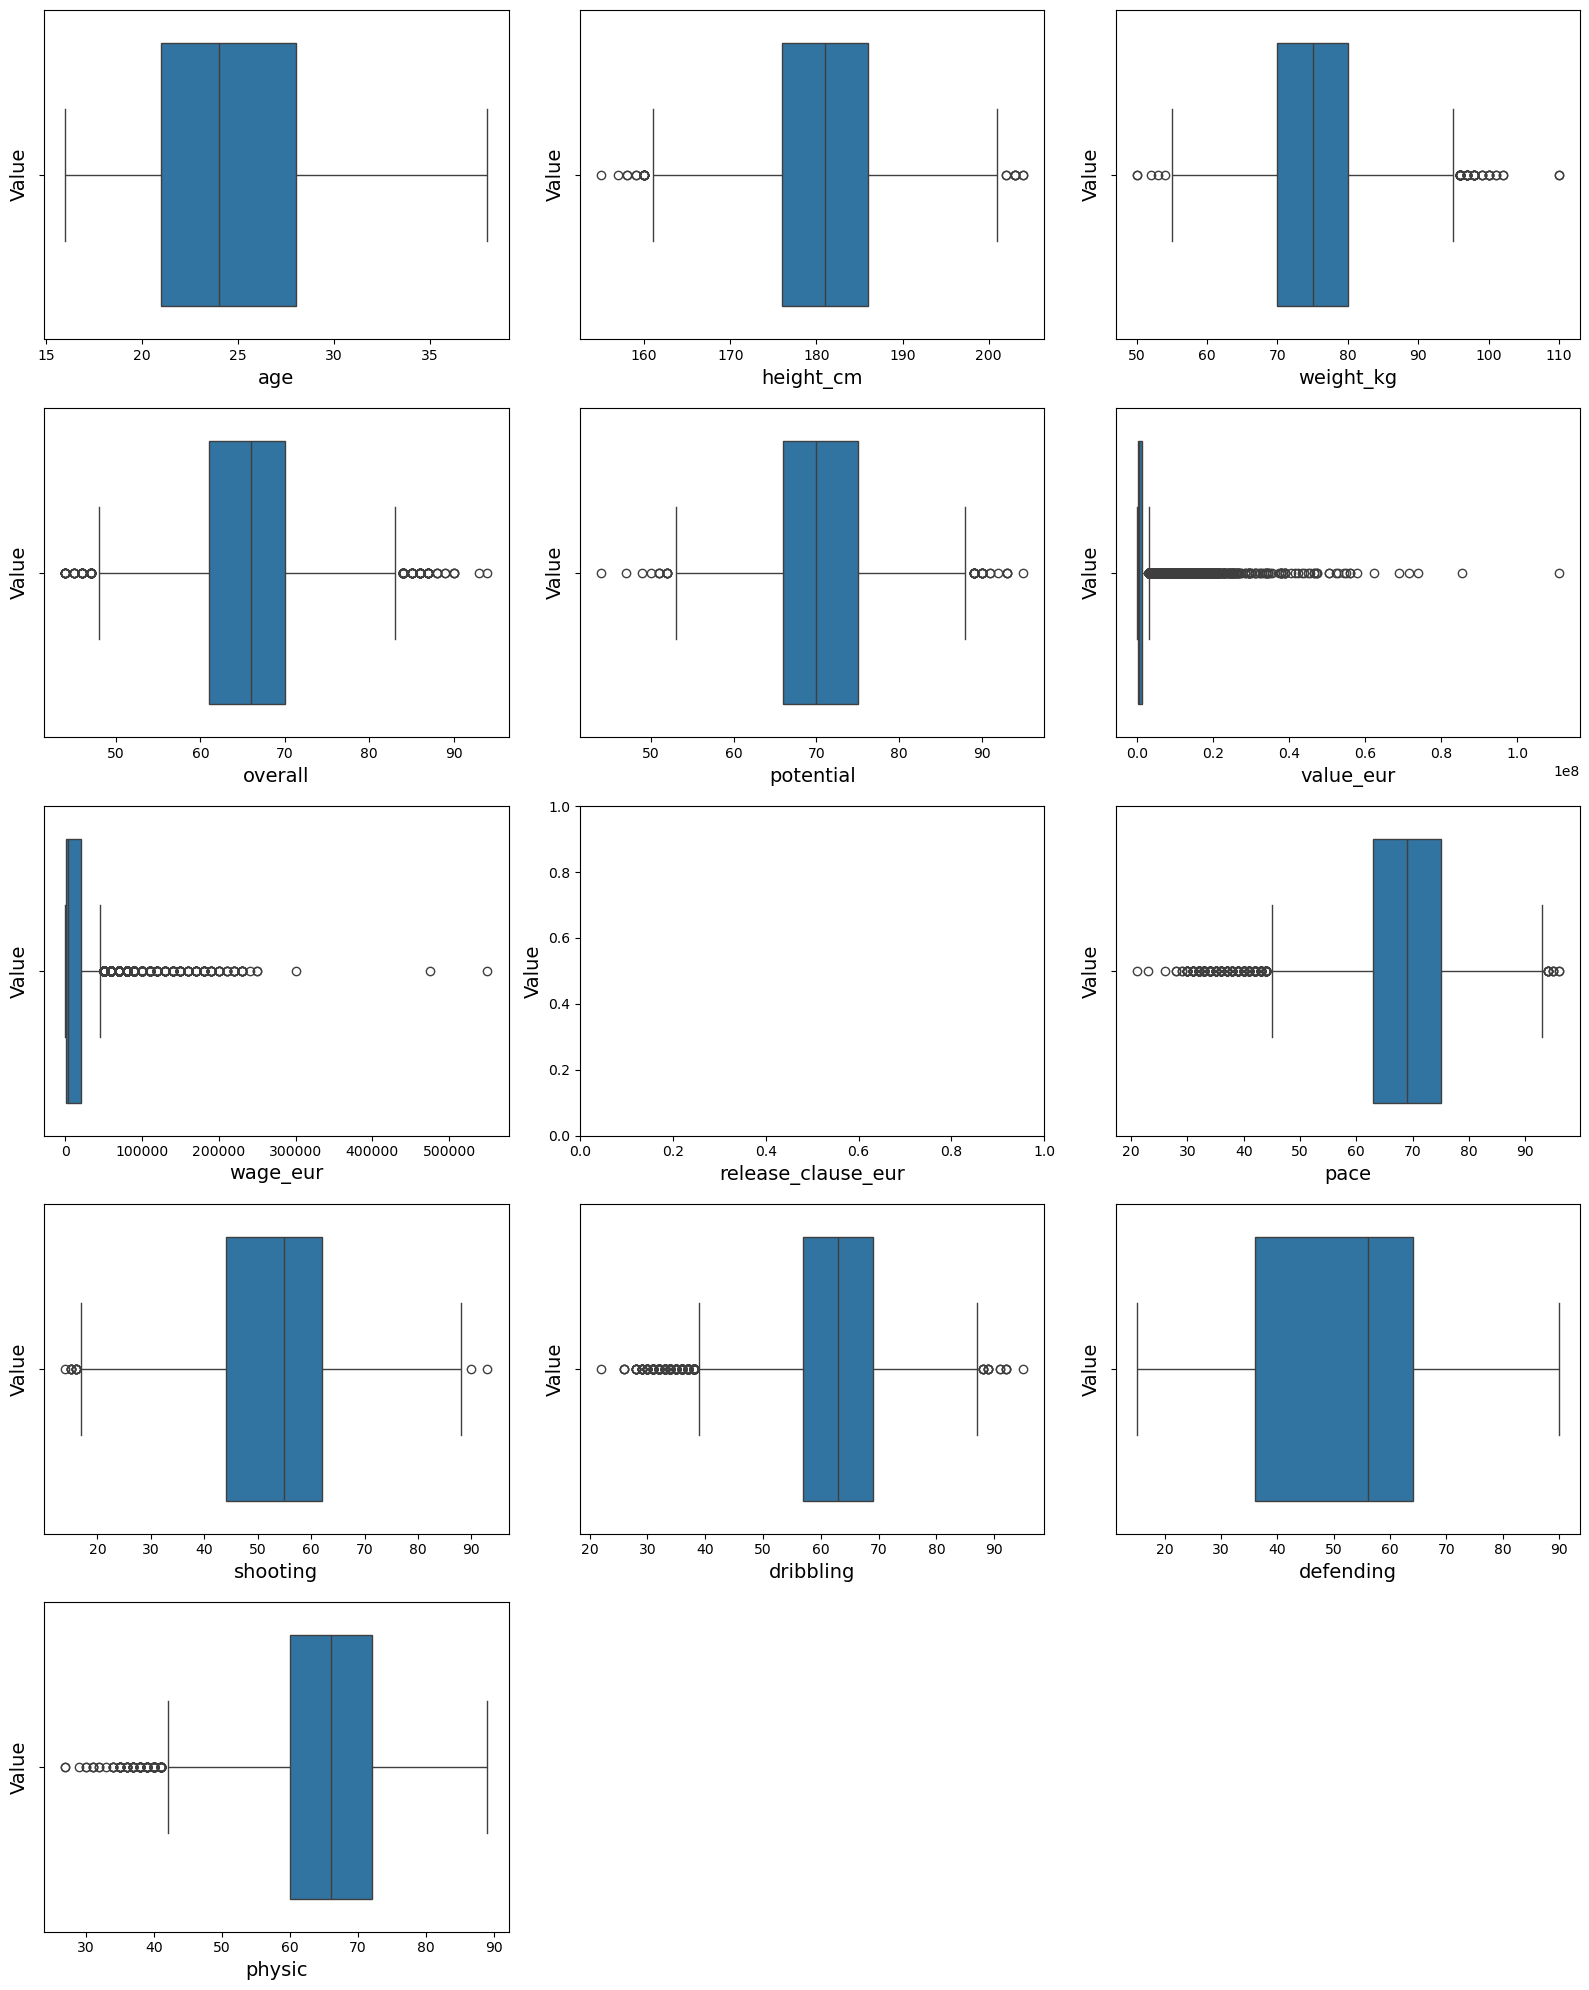

In [ ]:


outlier_check = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur',
                 'release_clause_eur','pace','shooting','dribbling','defending','physic']


num_data = df[outlier_check].copy()
num_data.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(16,20), facecolor="white")
plotnumber = 1

for column in outlier_check:
    if column in num_data.columns: 
        plt.subplot(5,3,plotnumber)
        clean_data = pd.to_numeric(num_data[column], errors='coerce').dropna()
        sns.boxplot(x=clean_data)
        plt.xlabel(column, fontsize=14)
        plt.ylabel("Value", fontsize=14)
        plotnumber += 1
plt.tight_layout()
plt.show()


In [37]:
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)

print("lower quartile",Q1)
print("upper quartile",Q3)

IQR=Q3-Q1
print(f"IQR is",IQR)

lower_limit=Q1-1.5*IQR
print("Lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("Upper limit is",upper_limit)

lower quartile 21.0
upper quartile 28.0
IQR is 7.0
Lower limit is 10.5
Upper limit is 38.5


In [38]:
df.loc[df["age"]>upper_limit]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
678,170801,https://sofifa.com/player/170801/nilson-correa...,Nilson,Nílson Corrêa Júnior,39,1975-12-26,185,80,Brazil,Moreirense FC,78,78,1400000,1000,GK,1,1,2,1,Medium/Medium,Normal,No,NaN,NaN,26,1.0,NaN,2015-07-10,2016.0,NaN,NaN,69.0,55.0,58.0,63.0,56.0,66.0,79.0,75.0,72.0,78.0,41.0,76.0,NaN,11,15,11,21,13,12,13,13,16,23,42,41,51,84,70,21,78,30,71,14,27,21,16,32,13,NaN,17,17,13,79,75,72,76,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,2651,https://sofifa.com/player/2651/shay-given/16/1...,S. Given,Shay Given,39,1976-04-20,185,84,Republic of Ireland,Stoke City,75,75,700000,25000,GK,1,2,3,1,Medium/Medium,Normal,Yes,NaN,NaN,28,24.0,NaN,2015-07-10,2017.0,GK,16.0,69.0,55.0,58.0,63.0,56.0,66.0,72.0,73.0,72.0,75.0,44.0,79.0,NaN,12-13,14-11,13-12,38+1,20-5,13-12,20-5,13-12,33+1,24+1,41,46,47,74+1,55,42+1,74,29,58,12-13,43+1,27+1,13-12,16-9,44+1,NaN,14-11,11-14,12-13,72+1,73+1,72+1,79+1,75+1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,19896,https://sofifa.com/player/19896/juan-carlos-va...,Valerón,Juan Carlos Valerón Santana,40,1975-06-17,186,76,Spain,UD Las Palmas,74,74,0,20000,"CAM, CM",1,2,4,4,Medium/Low,Lean,Yes,NaN,Playmaker,28,21.0,NaN,2013-07-15,2016.0,NaN,NaN,34.0,59.0,80.0,76.0,23.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Playmaker (CPU AI Only), Swerve P...",72+1,60+1,63+1,86+3,59+1,77+3,72+1,67+1,73+1,83+2,36-6,33-1,49,80+2,65,49+1,27,26-7,43,63+1,34+1,27+1,64+1,88+1,66+1,NaN,14-11,20-5,14-11,7+1,8+1,14+1,9+1,8+1,63.0,63.0,63.0,69.0,70.0,70.0,70.0,69.0,74.0,74.0,74.0,69.0,70.0,70.0,70.0,69.0,47.0,50.0,50.0,50.0,47.0,42.0,36.0,36.0,36.0,42.0
1896,24438,https://sofifa.com/player/24438/mario-yepes/16...,M. Yepes,Mario Alberto Yepes Díaz,39,1976-01-13,186,83,Colombia,San Lorenzo de Almagro,74,74,0,25000,CB,0,2,3,2,Low/High,Normal,No,NaN,NaN,24,3.0,NaN,2014-09-12,2015.0,NaN,NaN,34.0,36.0,46.0,40.0,77.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Leadership, Power Header",17-8,28+1,72+1,58+1,25+1,31+1,38+1,44+1,60+1,51+1,34,34,30,68+1,54,60+1,77+3,34,84,29+1,79+1,77+1,34+1,48+1,59+1,NaN,79+3,79+3,71+3,13+1,7+1,6+1,14+1,14+1,47.0,47.0,47.0,39.0,44.0,44.0,44.0,39.0,45.0,45.0,45.0,41.0,52.0,52.0,52.0,41.0,54.0,66.0,66.0,66.0,54.0,58.0,74.0,74.0,74.0,58.0
2333,684,https://sofifa.com/player/684/mark-schwarzer/1...,M. Schwarzer,Mark Schwarzer,42,1972-10-06,194,95,Australia,Leicester City,73,73,500000,15000,GK,1,2,3,1,Medium/Medium,Normal,No,NaN,NaN,28,32.0,NaN,2015-01-06,2016.0,NaN,NaN,69.0,55.0,58.0,63.0,56.0,66.0,70.0,73.0,67.0,71.0,48.0,78.0,NaN,13-12,11-14,14-11,24+1,17-8,13-12,14-11,11-14,23+1,17-8,50,46,36,79-3,43,29+1,57,19-26,70,18-7,40+1,22+1,19-6,31+11,34-6,NaN,17-8,19-6,

In [ ]:
len(df.loc[df["age"]>upper_limit])/len(df)

df.loc[df["age"]>upper_limit,"age"]=df["age"].median()
df.loc[df["age"]<lower_limit]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [ ]:
lower_limit=df["height_cm"].mean()